## Análisis de accidentes - Buses

### Area metropolitana del Valle de Aburrá

Manuela Cordoba

Alejandro Fernandez

Ana María Jaramillo

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pycaret.classification import *
from sklearn.model_selection import train_test_split
from imblearn.combine import *
import config

In [39]:
dataset_for_spatial_analysis = pd.read_csv(config.DATASET_WITH_SPATIAL_INFO)

In [40]:
dataset_for_spatial_analysis.columns

Index(['geoco_type', 'severity', 'month', 'day', 'area_code',
       'user_category_code', 'subcategory', 'hierarchy', 'road_class',
       'stratum', 'accident_type', 'vehicle_class', 'service_type', 'brand',
       'model', 'zone', 'design', 'driver_age', 'gender', 'weekday', 'hour',
       'GiZScore_Count', 'GiPValue_Count', 'GiZScore_Severity',
       'GiPValue_Severity', 'NNeighbors_Severity', 'LMiIndex_Anselin_Count',
       'LMiZScore_Anselin_Count', 'LMiPValue_Anselin_Count',
       'COType_Anselin_Count', 'NNeighbors_Anselin_Count',
       'SpatialLag_Anselin_Count', 'LMiIndex_Anselin_Sev',
       'LMiZScore_Anselin_Sev', 'COType_Anselin_Sev',
       'ZTransform_Anselin_Sev'],
      dtype='object')

In [41]:
columns_list = [col for col in dataset_for_spatial_analysis.columns if col != 'severity']

# Separate numeric and string columns
numeric_columns = []
string_columns = []

# Check if each column is numeric or contains strings
for col in columns_list:
    if pd.to_numeric(dataset_for_spatial_analysis[col], errors='coerce').notnull().all():
        numeric_columns.append(col)
    else:
        string_columns.append(col)

# Print numeric and string columns
print("Numeric Columns:", numeric_columns)
print("String Columns:", string_columns)


Numeric Columns: ['month', 'day', 'user_category_code', 'hierarchy', 'road_class', 'stratum', 'model', 'driver_age', 'hour']
String Columns: ['geoco_type', 'area_code', 'subcategory', 'accident_type', 'vehicle_class', 'service_type', 'brand', 'zone', 'design', 'gender', 'weekday', 'GiZScore_Count', 'GiPValue_Count', 'GiZScore_Severity', 'GiPValue_Severity', 'NNeighbors_Severity', 'LMiIndex_Anselin_Count', 'LMiZScore_Anselin_Count', 'LMiPValue_Anselin_Count', 'COType_Anselin_Count', 'NNeighbors_Anselin_Count', 'SpatialLag_Anselin_Count', 'LMiIndex_Anselin_Sev', 'LMiZScore_Anselin_Sev', 'COType_Anselin_Sev', 'ZTransform_Anselin_Sev']


In [42]:
# Remove 'month' and 'day' from the numeric columns list
numeric_columns.remove('month')
numeric_columns.remove('day')

# Add 'month' and 'day' to the string columns list
string_columns.extend(['month', 'day'])

# Print numeric and string columns
print("Numeric Columns:", numeric_columns)
print("String Columns:", string_columns)

Numeric Columns: ['user_category_code', 'hierarchy', 'road_class', 'stratum', 'model', 'driver_age', 'hour']
String Columns: ['geoco_type', 'area_code', 'subcategory', 'accident_type', 'vehicle_class', 'service_type', 'brand', 'zone', 'design', 'gender', 'weekday', 'GiZScore_Count', 'GiPValue_Count', 'GiZScore_Severity', 'GiPValue_Severity', 'NNeighbors_Severity', 'LMiIndex_Anselin_Count', 'LMiZScore_Anselin_Count', 'LMiPValue_Anselin_Count', 'COType_Anselin_Count', 'NNeighbors_Anselin_Count', 'SpatialLag_Anselin_Count', 'LMiIndex_Anselin_Sev', 'LMiZScore_Anselin_Sev', 'COType_Anselin_Sev', 'ZTransform_Anselin_Sev', 'month', 'day']


In [43]:
# Get unique values in the 'severity' column
dataset_for_spatial_analysis['severity'].unique()

array(['injured', 'material_damage_only', 'fatality'], dtype=object)

In [44]:
# Replace 'fatality' with 'injured'
dataset_for_spatial_analysis['severity'] = dataset_for_spatial_analysis['severity'].replace('fatality', 'injured')

# Verify the changes by checking unique values again
unique_values_after = dataset_for_spatial_analysis['severity'].unique()
print("Unique values after replacement:", unique_values_after)


Unique values after replacement: ['injured' 'material_damage_only']


In [45]:
dataset_for_spatial_analysis['severity'].value_counts(normalize=True)

severity
material_damage_only    0.752566
injured                 0.247434
Name: proportion, dtype: float64

In [46]:
# Setup the model with manual data type specification
setup(data=dataset_for_spatial_analysis, 
      target='severity', 
      fix_imbalance=True, 
      session_id=2023,
      normalize = True,
      data_split_stratify = True,
      fold_strategy = 'stratifiedkfold',
      numeric_features=numeric_columns,
      categorical_features=string_columns)#,
      #ignore_features=['clase_acci'],
      #normalize_method="zscore",
      #transformation=True)

,Description,Value
0,Session id,2023
1,Target,severity
2,Target type,Binary
3,Target mapping,"injured: 0, material_damage_only: 1"
4,Original data shape,"(79112, 36)"
5,Transformed data shape,"(107086, 128)"
6,Transformed train set shape,"(83352, 128)"
7,Transformed test set shape,"(23734, 128)"
8,Numeric features,7
9,Categorical features,28


In [47]:
train_model = compare_models(sort='Precision')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8577,0.8570,0.8577,0.8535,0.8476,0.5713,0.5888,2.6120
rf,Random Forest Classifier,0.8564,0.8563,0.8564,0.8511,0.8477,0.5735,0.5866,5.1190
gbc,Gradient Boosting Classifier,0.8544,0.8456,0.8544,0.8491,0.8447,0.5642,0.5792,19.7100
et,Extra Trees Classifier,0.8532,0.8507,0.8532,0.8470,0.8456,0.5695,0.5792,7.6310
ada,Ada Boost Classifier,0.8498,0.8352,0.8498,0.8435,0.8404,0.5530,0.5662,5.4110
svm,SVM - Linear Kernel,0.8438,0.8281,0.8438,0.8372,0.8379,0.5518,0.5573,3.1930
ridge,Ridge Classifier,0.8350,0.8437,0.8350,0.8312,0.8327,0.5451,0.5459,1.5140
lda,Linear Discriminant Analysis,0.8350,0.8437,0.8350,0.8312,0.8327,0.5450,0.5458,2.7270
lr,Logistic Regression,0.8281,0.8444,0.8281,0.8273,0.8276,0.5360,0.5361,5.0680
nb,Naive Bayes,0.7478,0.8111,0.7478,0.7971,0.7559,0.4161,0.4337,2.3190


In [49]:
best = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8572,0.8521,0.8572,0.8527,0.8472,0.5709,0.5875
1,0.8584,0.8600,0.8584,0.8541,0.8487,0.5751,0.5915
2,0.8620,0.8658,0.8620,0.8577,0.8534,0.5890,0.6033
3,0.8579,0.8622,0.8579,0.8536,0.8479,0.5726,0.5894
4,0.8622,0.8639,0.8622,0.8585,0.8529,0.5868,0.6031
5,0.8518,0.8522,0.8518,0.8469,0.8405,0.5507,0.5694
6,0.8507,0.8533,0.8507,0.8456,0.8393,0.5472,0.5660
7,0.8602,0.8566,0.8602,0.8568,0.8500,0.5779,0.5963
8,0.8580,0.8519,0.8580,0.8544,0.8474,0.5702,0.5893


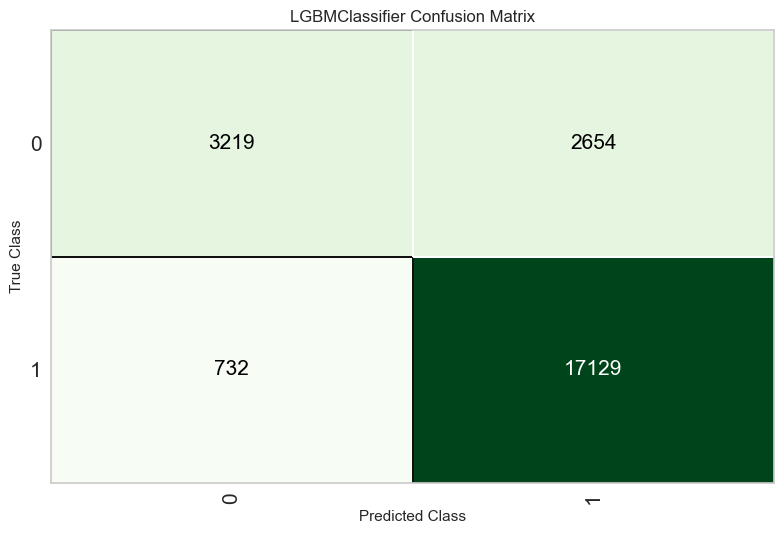

In [50]:
plot_model(best, plot = 'confusion_matrix')

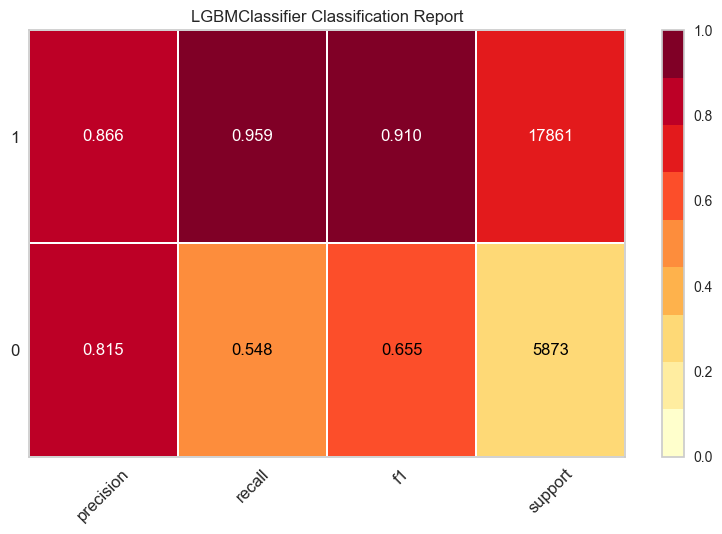

In [51]:
plot_model(estimator=best, plot="class_report")

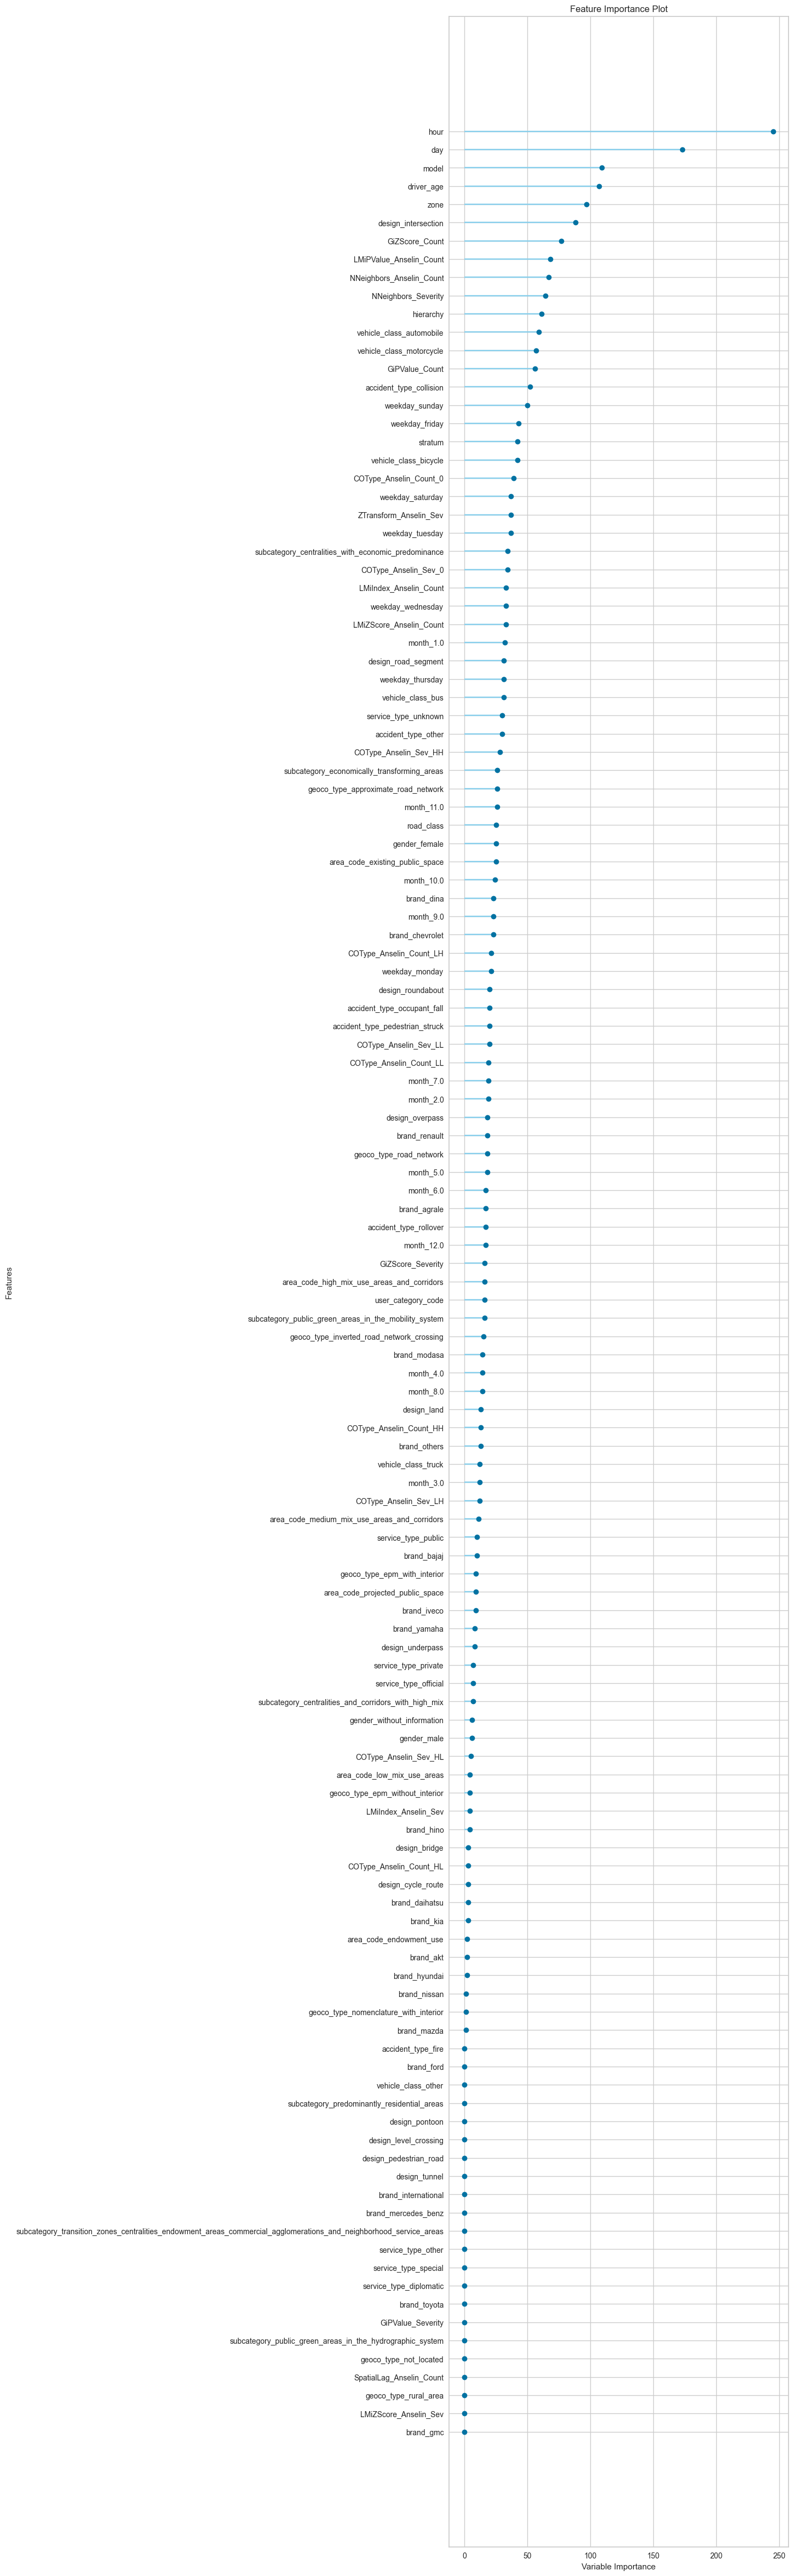

In [52]:
# Visualize feature importance
plot_model(best, plot='feature_all')